# National team match prediction

## 1. Defining the Question

### a) Specifying the Question


> You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

>A Prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

>You have two possible approaches (as  shown below) given the datasets that will be provided

>Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

>Approach 1: Polynomial approach

>What to train given:

>Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores

>Model 2: Predict how many goals the away team scores

 

>Approach 2 Logistic approach

>Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)



### b) Defining the Metric for Success

> 1. Create a model that can predict if the home team wins, draws or loses with 95% or more accuracy.
> 2. Create a model that can correctly predict number of goals scored by a team based on it's FIFA ranking.


### c) Understanding the context 

> The data provided in the results dataset is the results of national team matches from 1874 to 2019.
> In the FIFA rankings dataset, the data is the historical ranking and variation of ranking of national teams with time from 1993 to 2018.

### d) Recording the Experimental Design

>This project was carried out using the following procession:

>1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
Expected flow for the assessment:
>2. Perform your EDA
- Perform any necessary feature engineering
- Check of multicollinearity
- Start building the model
- Cross-validate the model
- Compute RMSE
- Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
>3. Perform appropriate regressions on the data including your justification
>4. Challenge your solution by providing insights on how you can make improvements.

## 2. Reading the Data

In [1]:
# Loading the Libraries we will need
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import random
from sklearn.model_selection import GridSearchCV
import scipy as sp

In [44]:
# Loading the Datasets
results = pd.read_csv('results.csv')
fifa_ranking = pd.read_csv('fifa_ranking.csv')

In [45]:
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


## 3. Checking the Data

In [87]:
# Determining the no. of records in our dataset
#
print(results.info())
print('\n')
print('*****************************************')
print('\n')
print(fifa_ranking.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB
None


*****************************************


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_av

>The Results dataset has 40893 entries.
The Fifa Ranking dataset has 57793 entries.

In [88]:
# Previewing the top of our results dataset
#
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [89]:
# Previewing the top of the Fifa rankings dataset
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [9]:
# Previewing the bottom of the results dataset
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [10]:
# Previewing the bottom of the fifa results dataset
fifa_ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [15]:
# Checking whether each column in the results dataset has an appropriate datatype
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

>The date column does not have an appropriate data type.

In [14]:
# Checking whether each column in the fifa ranking has an appropriate data type
fifa_ranking.dtypes


rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

>The rank date column does not have an appropriate data type.

In [46]:
# converting both columns in the two datasets to an appropriate data type.
results['date'] = pd.to_datetime(results['date'])
fifa_ranking['rank_date'] = pd.to_datetime(fifa_ranking['rank_date'])

In [91]:
# confirming the changes made.
print(results.dtypes)
print('\n')
print('**********************************************')
print('\n')
print(fifa_ranking.dtypes)

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object


**********************************************


rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dt

## 4. External Data Source Validation

The data was confirmed that it potrayed fifa rankings and results of national teams that existed in this physical universe.

## 5. Tidying the Dataset

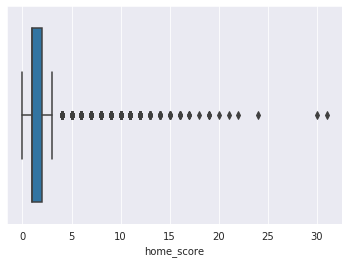

In [92]:
# checking for outliers
a=sns.boxplot(x=results['home_score'])


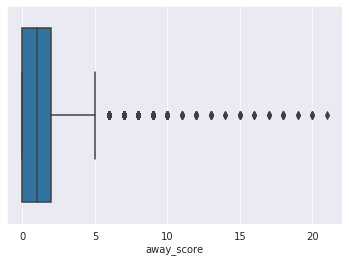

In [93]:
sns.boxplot(x=results['away_score'])

In [47]:
# Dropping outliers
# dropping values greater than 5 since the probability of a team scoring more than 5 goals is very low.
results=results[results['home_score']<=5]
results=results[results['away_score']<=5]

In [48]:
# separating the year and month from the date columns in both datasets.
results['year']=results['date'].dt.year
results['month']=results['date'].dt.month
fifa_ranking['year']=fifa_ranking['rank_date'].dt.year
fifa_ranking['month']=fifa_ranking['rank_date'].dt.month


In [49]:
# Creating a column of if a home team won or lost in the results dataset

# First we create a column of the goal difference between the scores.

results['goal_difference'] = results['home_score'] - results['away_score']

# Then we create a function that we will use to iterate over the column created to create another column that
# contains the outcome of the matches from the home teams perspective.

def home_performance(goals):
    if goals > 0:      # If the goal difference is greater than 0, the home team won the game
        return 'Win'
    elif goals < 0:    # If the goal difference is less than 0, the home team lost the game.
        return 'Loss'
    else:
        return 'Draw'  # If the goal difference is zero, the match ended in a draw.
    
# Applying the function through the whole dataframe.
results['home_performance'] = results.goal_difference.apply(lambda x: home_performance(x))

In [50]:
# Dropping the goal difference column
results=results.drop('goal_difference', axis=1)
# Previewing the dataset once more to confirm.

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_performance
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,Win


In [51]:
# Identifying the Missing Data
print(results.isnull().sum())
print('\n')
print('***************************')
print('\n')
print(fifa_ranking.isnull().sum())

date                0
home_team           0
away_team           0
home_score          0
away_score          0
tournament          0
city                0
country             0
neutral             0
year                0
month               0
home_performance    0
dtype: int64


***************************


rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
year                       0
month                      0
dtype: int64


>The two datasets have no missing data

In [51]:
# Since the Fifa ranking dataset starts at 1993-08-08 and ends on 2018-06-07
# and the results dataset starts at 1874 and ends at 2019, we will drop the data whose 
# rankings we dont have.
results=results[results['date']>='1993-08-08']
results=results[results['date']<= '2018-06-07']

In [52]:
# Importing the rankings of home team and away team from the fifa ranking dataset from when they played.
# before merging, we make sure that the columns we want to merge on have similar names.
fifa_home=fifa_ranking.copy()
fifa_home=fifa_home.rename({'country_full': 'home_team'}, axis=1)
home_team=pd.merge(results, fifa_home, how='left', on=['home_team', 'year', 'month'])


In [100]:
home_team.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [53]:
home_team=home_team.rename({'rank': 'home_team_rank', 'rank_change': 'home_team_rank_change', 'total_points': 'home_team_total_points', 'previous_points': 'home_team_previous_points'}, axis=1)

In [54]:
# Dropping unnecessary columns
home_team.drop(columns=['cur_year_avg', 'cur_year_avg_weighted',
       'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg',
       'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'city', 'country', 'country_abrv'], inplace=True)

In [55]:
home_team.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_performance,home_team_rank,home_team_total_points,home_team_previous_points,home_team_rank_change,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,Win,59.0,0.0,13.0,28.0,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8,Draw,8.0,0.0,55.0,-5.0,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,1993,8,Win,35.0,0.0,23.0,30.0,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,1993,8,Win,65.0,0.0,23.0,-2.0,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,1993,8,Loss,67.0,0.0,22.0,1.0,1993-08-08


In [56]:
home_team.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'neutral', 'year', 'month', 'home_performance',
       'home_team_rank', 'home_team_total_points', 'home_team_previous_points',
       'home_team_rank_change', 'rank_date'],
      dtype='object')

In [57]:
# Adding the away team ranking and necessary columns from the FIFA rankings dataset.
fifa_away=fifa_ranking.copy()
fifa_away=fifa_away.rename({'country_full': 'away_team', 'rank_date': 'date_x'}, axis=1)
cleaned_results=pd.merge(home_team, fifa_away, how='left', on=['away_team', 'year', 'month'])


In [58]:
cleaned_results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'neutral', 'year', 'month', 'home_performance',
       'home_team_rank', 'home_team_total_points', 'home_team_previous_points',
       'home_team_rank_change', 'rank_date', 'rank', 'country_abrv',
       'total_points', 'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date_x'],
      dtype='object')

In [59]:
cleaned_results=cleaned_results.rename({'rank': 'away_team_rank', 'rank_change': 'away_team_rank_change', 'total_points': 'away_team_total_points', 'previous_points': 'away_team_previous_points'}, axis=1)

In [60]:
cleaned_results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'neutral', 'year', 'month', 'home_performance',
       'home_team_rank', 'home_team_total_points', 'home_team_previous_points',
       'home_team_rank_change', 'rank_date', 'away_team_rank', 'country_abrv',
       'away_team_total_points', 'away_team_previous_points',
       'away_team_rank_change', 'cur_year_avg', 'cur_year_avg_weighted',
       'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg',
       'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date_x'],
      dtype='object')

In [61]:
# Dropping unnecessary columns from the cleaned dataset containing home and away team ranks.
cleaned_results.drop(columns=['country_abrv', 'cur_year_avg', 'cur_year_avg_weighted',
       'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg',
       'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date_x'], inplace=True)

In [62]:
cleaned_results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'neutral', 'year', 'month', 'home_performance',
       'home_team_rank', 'home_team_total_points', 'home_team_previous_points',
       'home_team_rank_change', 'rank_date', 'away_team_rank',
       'away_team_total_points', 'away_team_previous_points',
       'away_team_rank_change'],
      dtype='object')

>After adding the rank, some of the teams in the dataset are not ranked in the FIFA list. Therefore, these results were dropped

In [63]:
# checking the null values
cleaned_results.isnull().sum()

date                            0
home_team                       0
away_team                       0
home_score                      0
away_score                      0
tournament                      0
neutral                         0
year                            0
month                           0
home_performance                0
home_team_rank               3229
home_team_total_points       3229
home_team_previous_points    3229
home_team_rank_change        3229
rank_date                    3229
away_team_rank               3300
away_team_total_points       3300
away_team_previous_points    3300
away_team_rank_change        3300
dtype: int64

In [64]:
# Dropping the rows with null values
cleaned_results=cleaned_results.dropna()

In [65]:
# previewing the final dataset
cleaned_results.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_performance,home_team_rank,home_team_total_points,home_team_previous_points,home_team_rank_change,rank_date,away_team_rank,away_team_total_points,away_team_previous_points,away_team_rank_change
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,Win,59.0,0.0,13.0,28.0,1993-08-08,22.0,0.0,47.0,-6.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8,Draw,8.0,0.0,55.0,-5.0,1993-08-08,14.0,0.0,42.0,11.0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,1993,8,Win,35.0,0.0,23.0,30.0,1993-08-08,94.0,0.0,4.0,31.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,1993,8,Win,65.0,0.0,23.0,-2.0,1993-08-08,86.0,0.0,16.0,-7.0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,1993,8,Loss,67.0,0.0,22.0,1.0,1993-08-08,5.0,0.0,51.0,5.0


In [24]:
cleaned_results.tournament.unique()

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament',
       'CFU Caribbean Cup qualification', 'African Cup of Nations',
       'CFU Caribbean Cup', 'UEFA Euro qualification', 'Kirin Cup',
       'FIFA World Cup', 'Oceania Nations Cup qualification',
       'Baltic Cup', 'Gulf Cup', 'Simba Tournament', 'CECAFA Cup',
       'Dynasty Cup', "King's Cup", 'SAFF Cup', 'Copa Paz del Chaco',
       'Korea Cup', 'USA Cup', 'Copa América', 'Merdeka Tournament',
       'South Pacific Games', 'UNCAF Cup', 'Oceania Nations Cup',
       'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'Lunar New Year Cup',
       'AFF Championship', 'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup', 'Nehru Cup',
       'COSAFA Cup', 'Tournoi de France', 'Confederations Cup',

In [27]:
def tournament(x):
    if x=='Friendly':
        return 'Friendly'
    elif x=='FIFA World Cup':
        return 'World cup'
    else:
        return 'Other'

In [66]:
cleaned_results['tourna'] = cleaned_results.tournament.apply(lambda x: tournament(x))

In [68]:
cleaned_results.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_performance,home_team_rank,home_team_total_points,home_team_previous_points,home_team_rank_change,rank_date,away_team_rank,away_team_total_points,away_team_previous_points,away_team_rank_change,tourna
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,Win,59.0,0.0,13.0,28.0,1993-08-08,22.0,0.0,47.0,-6.0,Other
1,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8,Draw,8.0,0.0,55.0,-5.0,1993-08-08,14.0,0.0,42.0,11.0,Friendly
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,1993,8,Win,35.0,0.0,23.0,30.0,1993-08-08,94.0,0.0,4.0,31.0,Other
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,1993,8,Win,65.0,0.0,23.0,-2.0,1993-08-08,86.0,0.0,16.0,-7.0,Friendly
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,1993,8,Loss,67.0,0.0,22.0,1.0,1993-08-08,5.0,0.0,51.0,5.0,Other


In [69]:
# Creating dummy variables for the tournament column.
dummy=pd.get_dummies(cleaned_results['tourna'])
cleaned=pd.concat([cleaned_results, dummy], axis=1)
cleaned.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_performance,...,home_team_rank_change,rank_date,away_team_rank,away_team_total_points,away_team_previous_points,away_team_rank_change,tourna,Friendly,Other,World cup
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,Win,...,28.0,1993-08-08,22.0,0.0,47.0,-6.0,Other,0,1,0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8,Draw,...,-5.0,1993-08-08,14.0,0.0,42.0,11.0,Friendly,1,0,0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,1993,8,Win,...,30.0,1993-08-08,94.0,0.0,4.0,31.0,Other,0,1,0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,1993,8,Win,...,-2.0,1993-08-08,86.0,0.0,16.0,-7.0,Friendly,1,0,0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,1993,8,Loss,...,1.0,1993-08-08,5.0,0.0,51.0,5.0,Other,0,1,0


In [70]:
# dropping the tournament column
cleaned.drop(columns=['tournament', 'tourna'], inplace=True)

In [71]:
# creating a dummy variable for the neutral column
dumm=pd.get_dummies(cleaned['neutral'])
cleaned=pd.concat([cleaned, dumm], axis=1)

In [72]:
cleaned.columns

Index([                     'date',                 'home_team',
                       'away_team',                'home_score',
                      'away_score',                   'neutral',
                            'year',                     'month',
                'home_performance',            'home_team_rank',
          'home_team_total_points', 'home_team_previous_points',
           'home_team_rank_change',                 'rank_date',
                  'away_team_rank',    'away_team_total_points',
       'away_team_previous_points',     'away_team_rank_change',
                        'Friendly',                     'Other',
                       'World cup',                       False,
                              True],
      dtype='object')

>The dataset is now ready for modelling

## 6. Exploratory Analysis

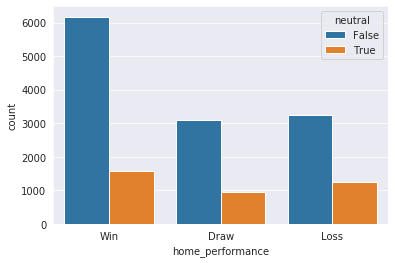

In [122]:
# Ploting the univariate summaries and recording our observations
#
# countplot of the home team results
sns.countplot(x='home_performance', data=cleaned_results, hue='neutral')

>From the graph we can theorize that a high proportion of home teams win matches when played on neutral grounds than when the ground is partisan.

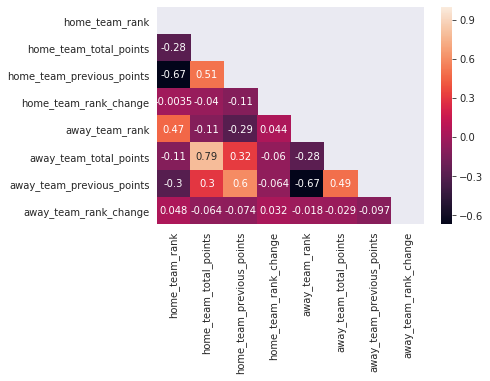

In [95]:
# Correlation heatmap of the numerical variables 
mask = np.zeros_like(cleaned_results.iloc[:, 9:].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cleaned_results.iloc[:, 9:].corr(), annot=True, mask=mask)

>From the correlation heatmap, we don't have highly correlated variables.

## 7. Implementing the Solution

### Approach 1: Polynomial approach

In [35]:
#Creating a dummy variable for the home team performance
dummm=pd.get_dummies(cleaned['home_performance'])
polynom=pd.concat([cleaned, dummm], axis=1)
polynom.drop(columns=['home_team', 'away_team', 'neutral', 'year', 'month', 'home_performance'], inplace=True)

In [39]:
polynom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21010 entries, 17915 to 39833
Data columns (total 13 columns):
date          21010 non-null datetime64[ns]
home_score    21010 non-null int64
away_score    21010 non-null int64
city          21010 non-null object
country       21010 non-null object
Friendly      21010 non-null uint8
Other         21010 non-null uint8
World cup     21010 non-null uint8
False         21010 non-null uint8
True          21010 non-null uint8
Draw          21010 non-null uint8
Loss          21010 non-null uint8
Win           21010 non-null uint8
dtypes: datetime64[ns](1), int64(2), object(2), uint8(8)
memory usage: 1.1+ MB


#### Model 1: Predicting the number of goals home team scores

In [125]:
# The independent variable used is the home team rank
a=polynom.home_team_rank.values.reshape(-1,1)
# The dependent variable, what we are predicting, is the number of goals scored by the home team.
b=polynom.home_score.values


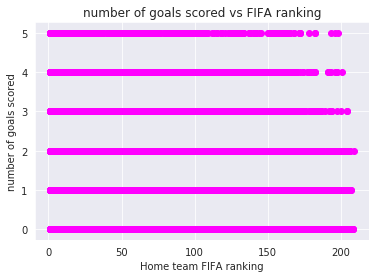

In [126]:
plt.scatter(a, b, color='magenta')
plt.xlabel('Home team FIFA ranking')
plt.ylabel('number of goals scored')
plt.title('number of goals scored vs FIFA ranking')
plt.show()

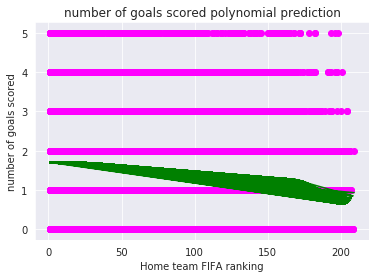

In [127]:
# Splitting the dataset into train and test sets.
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.25, random_state=0)
# Fitting polynomial regression into the dataset
poly_reg = PolynomialFeatures(degree=10)
a_poly = poly_reg.fit_transform(a)
pol_reg = LinearRegression()
pol_reg.fit(a_poly, b)
# Visualizing the polynomial regression result.
plt.scatter(a, b, color='magenta')
plt.plot(a, pol_reg.predict(a_poly), color='green')
plt.xlabel('Home team FIFA ranking')
plt.ylabel('number of goals scored')
plt.title('number of goals scored polynomial prediction')
plt.show()

In [128]:
# Making a prediction for number of goals scored by a home team ranked 78th.
poly_prediction=pol_reg.predict(poly_reg.fit_transform([[78]]))
print('polynomial prediction: %d' %poly_prediction)

polynomial prediction: 1


#### Model 2: Predicting the number of goals the away team scores.

In [129]:
# The independent variable used is the away team rank
c=polynom.away_team_rank.values.reshape(-1,1)
# The dependent variable, what we are predicting, is the number of goals scored by the away team.
d=polynom.away_score.values


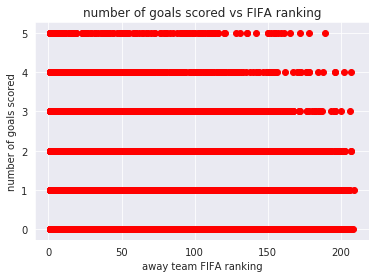

In [130]:
plt.scatter(c, d, color='red')
plt.xlabel('away team FIFA ranking')
plt.ylabel('number of goals scored')
plt.title('number of goals scored vs FIFA ranking')
plt.show()

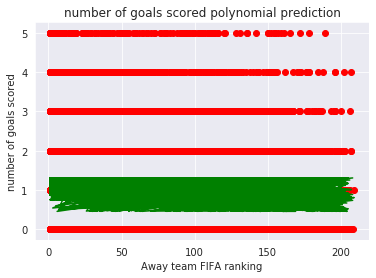

In [131]:
# Splitting the dataset into train and test sets.
c_train, c_test, d_train, d_test = train_test_split(c, d, test_size=0.25, random_state=0)
# Fitting polynomial regression into the dataset
poly_regr = PolynomialFeatures(degree=10)
c_poly = poly_regr.fit_transform(c)
pol_regr = LinearRegression()
pol_regr.fit(c_poly, d)
# Visualizing the polynomial regression result.
plt.scatter(c, d, color='red')
plt.plot(a, pol_regr.predict(c_poly), color='green')
plt.xlabel('Away team FIFA ranking')
plt.ylabel('number of goals scored')
plt.title('number of goals scored polynomial prediction')
plt.show()

In [132]:
# Making a prediction for number of goals scored by an away team ranked 78th
polyn_prediction=pol_regr.predict(poly_regr.fit_transform([[78]]))
print('polynomial prediction: %d' %polyn_prediction)

polynomial prediction: 0


#### Model 3: Predicting the number of goals scored by the home team using XGBRegressor

In [133]:
polynom=polynom.loc[:,~polynom.columns.duplicated()]

In [134]:

e=polynom.drop('home_score', axis=1)
# The dependent variable, what we are predicting, is the number of goals scored by the away team.
f=polynom.home_score


In [135]:
e_train, e_test, f_train, f_test = train_test_split(e, f, test_size=0.25, random_state=0)
regress=XGBRegressor()
regress.fit(e_train, f_train)
f_pred=regress.predict(e_test)
rmse=np.sqrt(metrics.mean_squared_error(f_test, f_pred))
print(rmse)

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[08:53:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7447739292299835


In [136]:
df=pd.DataFrame({'Actual': f_test, 'Prediction': f_pred})
df.describe()

,Actual,Prediction
count,4079.000000,4079.000000
mean,1.466046,1.456874
std,1.273821,1.002572
min,0.000000,-0.176808
25%,0.000000,0.551166
50%,1.000000,1.681042
75%,2.000000,2.291761
max,5.000000,4.277902


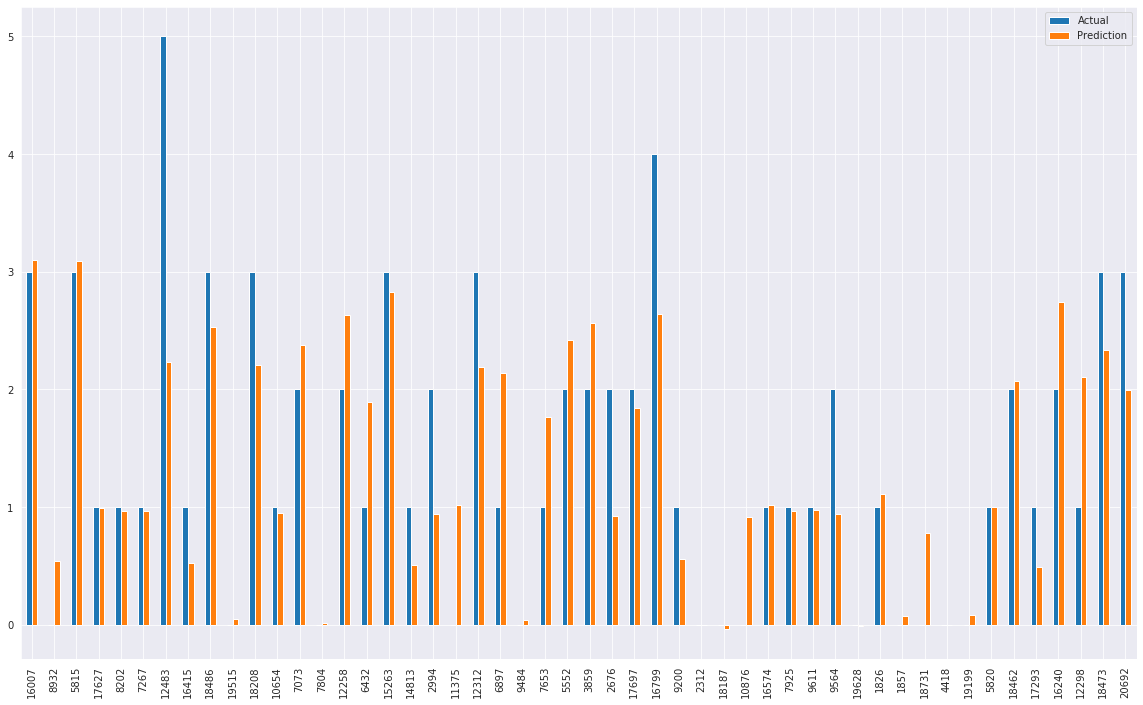

In [137]:
df1=df.head(50)
df1.plot(kind='bar', figsize=(20,12))
plt.show()

In [138]:
# Hyper-parameter tuning to improve the accuracy of the model.
e_train, e_test, f_train, f_test = train_test_split(e, f, test_size=0.25, random_state=0)
xgb1=XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(e_train,f_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed: 38.0min finished
/usr/local/lib/python3.7/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.646360382053534
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [139]:
e_train, e_test, f_train, f_test = train_test_split(e, f, test_size=0.25, random_state=0)
regress=XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.03, max_depth = 5, min_child_weight = 4, n_estimators = 500, nthread = 4, objective = 'reg:linear', silent = 1, subsample = 0.7)
regress.fit(e_train, f_train)
f_pred=regress.predict(e_test)
rmse1=np.sqrt(metrics.mean_squared_error(f_test, f_pred))
print(rmse1)

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.7451342789184414


In [140]:
df2=pd.DataFrame({'Actual': f_test, 'Prediction': f_pred})
df2.describe()

,Actual,Prediction
count,4079.000000,4079.000000
mean,1.466046,1.458828
std,1.273821,1.025074
min,0.000000,-0.195977
25%,0.000000,0.565864
50%,1.000000,1.591634
75%,2.000000,2.292975
max,5.000000,4.420075


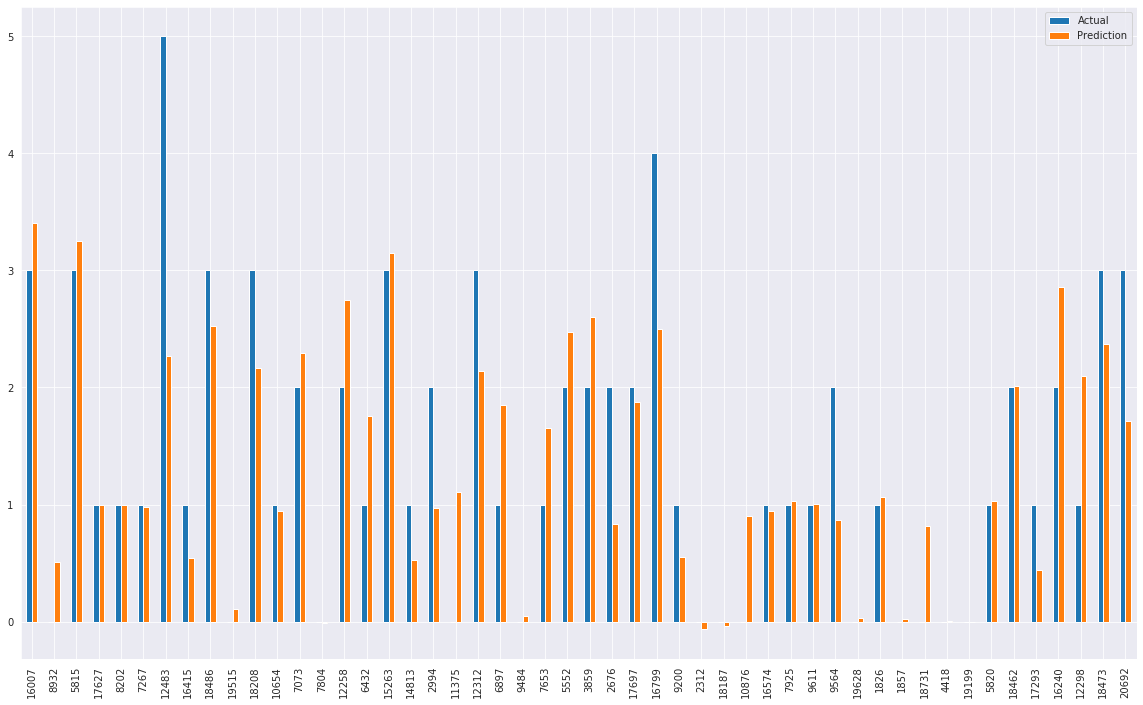

In [141]:
df3=df2.head(50)
df3.plot(kind='bar', figsize=(20,12))
plt.show()

>We reduced the RMSE of the model marginally by hyperparameter tuning. However, the model's prediction accuracy is still very poor.

#### Heteroskedasticity testing

In [142]:
residuals=np.subtract(f_pred, f_test)
pd.DataFrame(residuals).describe()

,home_score
count,4079.000000
mean,-0.007217
std,0.745191
min,-3.305555
25%,-0.248785
50%,0.009673
75%,0.463369
max,2.587060


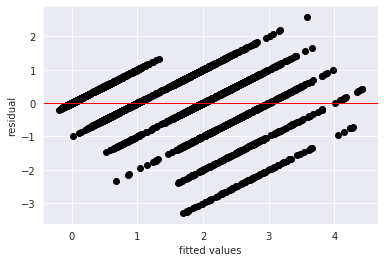

In [143]:
plt.scatter(f_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

>This looks bad as although our residuals are centered around a mean that is very close to 0, there is a glaringly obvious pattern.

#### Bartlett's test

In [144]:
# A Bartlett's test is used. It establishes a null hypothesis that the variance
# is equal for all data points and that the new hypothesis that the variance is 
# different for at least one pair of the data points.
test_result, p_value = sp.stats.bartlett(f_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(f_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



inf
the variances are homogeneous!


### Approach 2: Logistic regression

In [73]:
y=cleaned.home_performance

In [74]:
cleaned.columns


Index([                     'date',                 'home_team',
                       'away_team',                'home_score',
                      'away_score',                   'neutral',
                            'year',                     'month',
                'home_performance',            'home_team_rank',
          'home_team_total_points', 'home_team_previous_points',
           'home_team_rank_change',                 'rank_date',
                  'away_team_rank',    'away_team_total_points',
       'away_team_previous_points',     'away_team_rank_change',
                        'Friendly',                     'Other',
                       'World cup',                       False,
                              True],
      dtype='object')

In [75]:
cleaned.head()

,date,home_team,away_team,home_score,away_score,neutral,year,month,home_performance,home_team_rank,...,rank_date,away_team_rank,away_team_total_points,away_team_previous_points,away_team_rank_change,Friendly,Other,World cup,False,True
0,1993-08-08,Bolivia,Uruguay,3,1,False,1993,8,Win,59.0,...,1993-08-08,22.0,0.0,47.0,-6.0,0,1,0,1,0
1,1993-08-08,Brazil,Mexico,1,1,False,1993,8,Draw,8.0,...,1993-08-08,14.0,0.0,42.0,11.0,1,0,0,1,0
2,1993-08-08,Ecuador,Venezuela,5,0,False,1993,8,Win,35.0,...,1993-08-08,94.0,0.0,4.0,31.0,0,1,0,1,0
3,1993-08-08,Guinea,Sierra Leone,1,0,False,1993,8,Win,65.0,...,1993-08-08,86.0,0.0,16.0,-7.0,1,0,0,1,0
4,1993-08-08,Paraguay,Argentina,1,3,False,1993,8,Loss,67.0,...,1993-08-08,5.0,0.0,51.0,5.0,0,1,0,1,0


In [76]:
logistic=cleaned.drop(columns=['home_team', 'away_team', 'neutral', 'year', 'month', 'home_performance', 'home_score',
                                       'away_score', 'date'])
logistic.head()

,home_team_rank,home_team_total_points,home_team_previous_points,home_team_rank_change,rank_date,away_team_rank,away_team_total_points,away_team_previous_points,away_team_rank_change,Friendly,Other,World cup,False,True
0,59.0,0.0,13.0,28.0,1993-08-08,22.0,0.0,47.0,-6.0,0,1,0,1,0
1,8.0,0.0,55.0,-5.0,1993-08-08,14.0,0.0,42.0,11.0,1,0,0,1,0
2,35.0,0.0,23.0,30.0,1993-08-08,94.0,0.0,4.0,31.0,0,1,0,1,0
3,65.0,0.0,23.0,-2.0,1993-08-08,86.0,0.0,16.0,-7.0,1,0,0,1,0
4,67.0,0.0,22.0,1.0,1993-08-08,5.0,0.0,51.0,5.0,0,1,0,1,0


In [77]:
logistic=logistic.drop(columns=['rank_date'])

In [79]:
x=logistic

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=8, random_state=0)
   cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.583555 (0.011128)


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/dist-packages/sklearn

LDA: 0.580260 (0.012234)
KNN: 0.496820 (0.009038)
CART: 0.470615 (0.010167)
NB: 0.534288 (0.006721)
SVM: 0.479043 (0.008617)


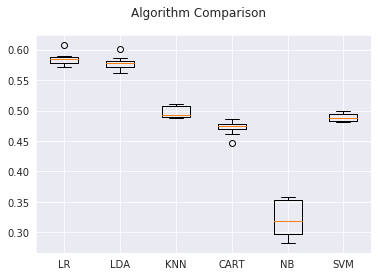

In [151]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

>Logistic Regression and Decision tree classifier are the two algorithms with high accuracy. However, only Logistic Regression will be used for the analysis. 

              precision    recall  f1-score   support

        Draw       0.00      0.00      0.00       843
        Loss       0.51      0.60      0.55       894
         Win       0.59      0.86      0.70      1526

    accuracy                           0.57      3263
   macro avg       0.37      0.49      0.42      3263
weighted avg       0.42      0.57      0.48      3263

Accuracy;  0.5651241189089795
[[   0  295  548]
 [   2  538  354]
 [   1  219 1306]]


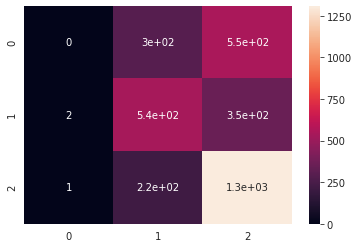

In [81]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)
classify=LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr')
classify.fit(x_train, y_train)
y_pred=classify.predict(x_test)

cm=confusion_matrix(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
#print('F1 score; ', f1_score(y_test, y_pred))
print('Accuracy; ', acc)
print(cm)


ax=sns.heatmap(cm, annot=True)
ax

## 8. Challenging the solution

> The polynomial approach yielded disappointing results as the number of goals scored and conceded is not only dependent on the FIFA ranking. The models therefore cannot be used to predict the number of goals with any level of accuracy.
The Multiple regression approach employed to predict the number of goals scored by home and away team had RMSE scores of more than 50% of the mean. They should therefore be disregarded.
This is mainly because the outcome of a match is highly dependent on other variables like key player fitness, morale, playing surface, time of match and red cards in the game that were not present in the dataset.





> Approach 2 was our best performing model as we could predict with 57% accuracy whether a team would win, draw or loose at home based on the tounament, if the ground was neutral and home team and away team FIFA ranking.
However, this result is still poor as it means that we can predict with a level of accuracy only marginally better than if it the result was picked at random. 
To increase the accuracy of the model, we need more data points to be able to predict an outcome of the match conclusively.